In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import os

/hpctmp/e0974164/modisco/lib/python3.9/site-packages/tqdm-4.64.1-py3.9.egg/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pic_save_path = 'pic_save'
if not os.path.exists(pic_save_path):
    os.mkdir(pic_save_path)
else:
    pass

In [3]:
model_grad1 = torch.load('model_save/modeltest5_grad.pth')
model_grad2 = torch.load('model_save/modeltest6_grad.pth')

In [4]:
x1 = torch.arange(-2.2, 2.2, 0.01).view(-1, 1)
x_np1 = x1.numpy()
a1, b, sigma = 0.3, 0.5, 0.5
p1 = lambda x: np.exp((2*a1*x**2 - b*x**4) / (2*(sigma**2)))
result1 = integrate.quad(p1, -2.2, 2.2)[0]
# result = integrate.quad(p1, -2.2, 2.2)[0]

In [9]:
result1

3.0797837519952203

In [5]:
x2 = torch.arange(-2.2, 2.2, 0.01).view(-1, 1)
x_np2 = x2.numpy()
a2, b, sigma = 0.5, 0.5, 0.5
p2 = lambda x: np.exp((2*a2*x**2 - b*x**4) / (2*(sigma**2)))
result2 = integrate.quad(p2, -2.2, 2.2)[0]

In [6]:
# y_nn_difference = model_difference(x)
y_nn_grad1 = model_grad1(x1)
y_real1 = p1(x_np1) / result1
y_nn_grad2 = model_grad2(x2)
y_real2 = p2(x_np2) / result2

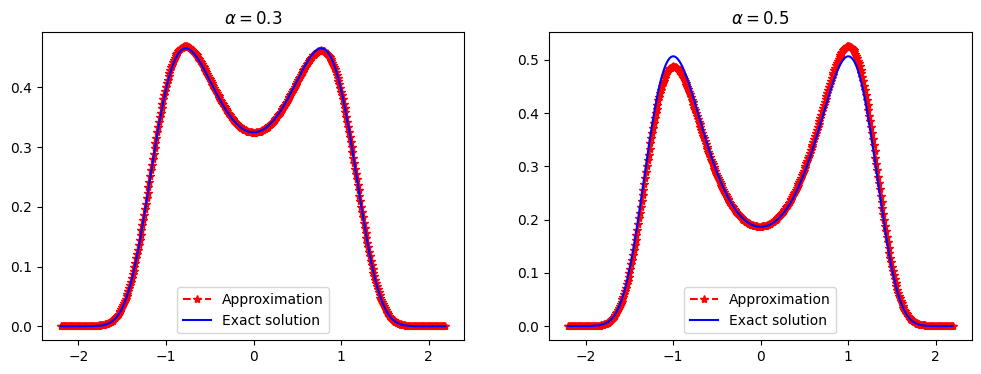

In [7]:
plt.figure(figsize=(12, 4))
# plt.plot(x_np, y_nn_difference.detach().numpy(), label='neural_network_difference')
plt.subplot(1,2,1)
plt.plot(x_np1, y_nn_grad1.detach().numpy(), label='Approximation', marker='*', linestyle='dashed', color='r')
plt.plot(x_np1, y_real1, label = 'Exact solution', color='b', linewidth=1.5)
plt.title(r'$\alpha=0.3$')
plt.legend(loc="lower center")

plt.subplot(1,2,2)
plt.plot(x_np2, y_nn_grad2.detach().numpy(), label='Approximation', marker='*', linestyle='dashed', color='r')
plt.plot(x_np2, y_real2, label = 'Exact solution', color='b', linewidth=1.5)
plt.title(r'$\alpha=0.5$')
plt.legend(loc="lower center")
plt.savefig('pic_save/dlfp_res.pdf', dpi=300)

In [26]:
p3 = lambda x: np.exp((2*0.3*x**2 - b*x**4) / (2*(sigma**2)))
result3 = integrate.quad(p3, -2.2, 2.2)[0]

In [27]:
result3

3.0797837519952203

In [28]:
440/result3

142.86717361728677